In [1]:
import os
import sys

# Sätt base_dir (projektets rotkatalog)
base_dir = os.path.abspath("..")  # En nivå upp från notebooks/
sys.path.append(base_dir)  # Lägg till base_dir i sys.path

# Nu fungerar importerna
from src.objects.optimizer import Optimizer
from src.objects.package import Package
from src.data_processing import load_data
from src.visualization import visualize_fitness, visualize_histogram, log_fitness_trends

import pandas as pd

lagerstatus = os.path.join(base_dir, "data", "lagerstatus1.csv")

# Kontrollera att imports fungerar
print("Imports lyckades!")

log_file = os.path.join(base_dir, "logs", "optimization.log")

# Rensa tidigare loggar
if os.path.exists(log_file):
    os.remove(log_file)

# Skapa en ny loggfil
with open(log_file, 'w') as f:
    f.write("New log file\n")


# Skapa testdataset
packages = load_data(lagerstatus)

print(f"Testdata skapad! {len(packages)}")

Imports lyckades!
Testdata skapad! 10000


In [6]:
optimizer = Optimizer(packages, max_trucks=10, max_capacity=800, log_file=log_file)

stats, best_solution = optimizer.optimize(population_size=50, generations=200, mutation_rate=0.1)

optimizer.display_results()


--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 799.7, Packages: 212)
Truck(Truck_2, Total Weight: 799.9, Packages: 215)
Truck(Truck_3, Total Weight: 799.7, Packages: 196)
Truck(Truck_4, Total Weight: 799.9, Packages: 205)
Truck(Truck_5, Total Weight: 798.8, Packages: 205)
Truck(Truck_6, Total Weight: 800.0, Packages: 206)
Truck(Truck_7, Total Weight: 799.9, Packages: 198)
Truck(Truck_8, Total Weight: 799.9, Packages: 190)
Truck(Truck_9, Total Weight: 798.4, Packages: 183)
Truck(Truck_10, Total Weight: 799.7, Packages: 177)

Totalt antal paket kvar i lager: 8013
Total Förtjänst (levererade paket): 8958.0
Totala Straffavgifter: -917.0
Actual total profit: 8041.0


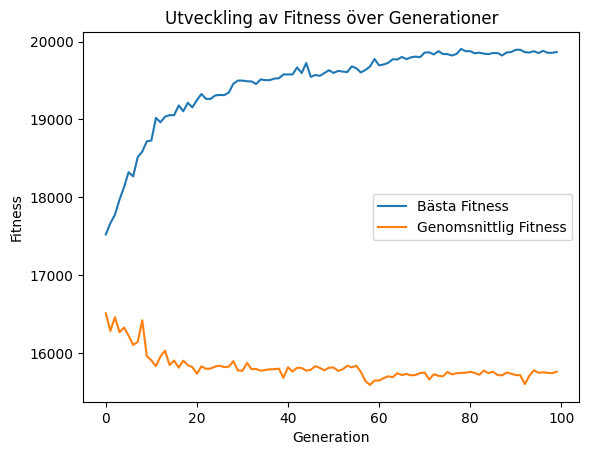

In [7]:
visualize_fitness(stats)

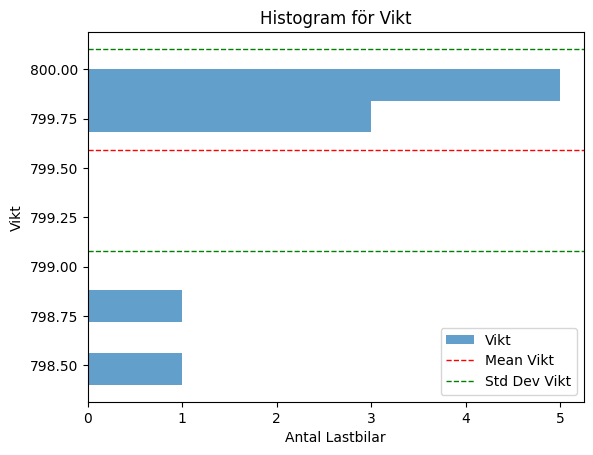

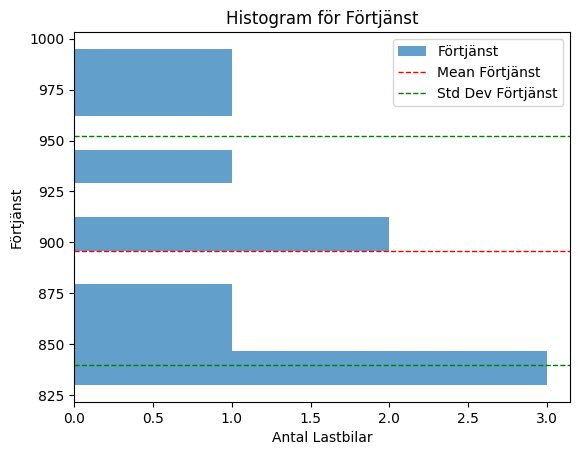

--- Statistik för Lastbilar ---
Medelvikt: 799.59, Varians: 0.26, Std Avvikelse: 0.51
Medelförtjänst: 895.80, Varians: 3161.96, Std Avvikelse: 56.23


In [8]:
optimizer.analyze_solution()